 # Visualize results from hyperparameter optimization

In [1]:
import os

import matplotlib.pyplot as plt
import pydove as dv
import pickle

 ## Load optuna results

In [2]:
contexts = [
    "mnist_pcn_one",
    "mnist_biopcn_one",
    "mnist_pcn_two",
    "mnist_biopcn_two",
    "mnist_pcn_large-two",
]

studies = {}
for context in contexts:
    path = os.path.join("hyper", context)
    filenames = [
        os.path.join(path, f)
        for f in os.listdir(path)
        if os.path.isfile(os.path.join(path, f))
    ]

    studies[context] = []
    for name in filenames:
        with open(name, "rb") as f:
            studies[context].append(pickle.load(f))

 ## Show best parameters from each run

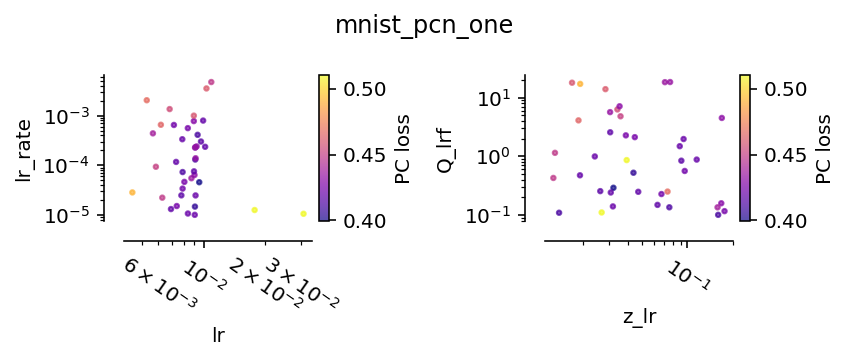

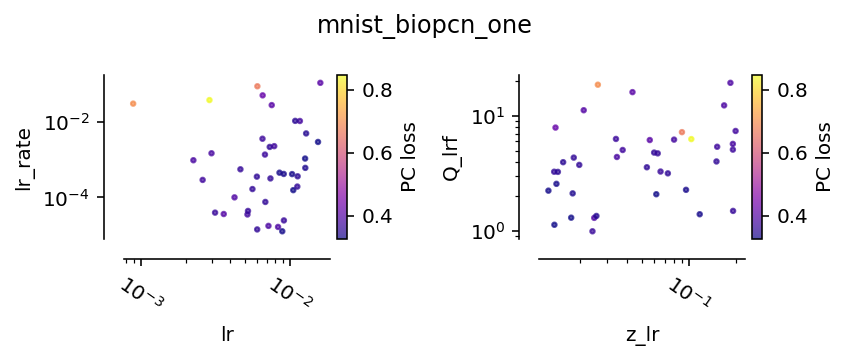

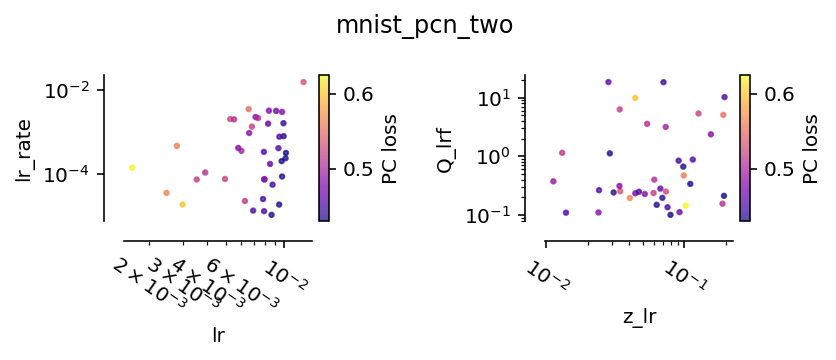

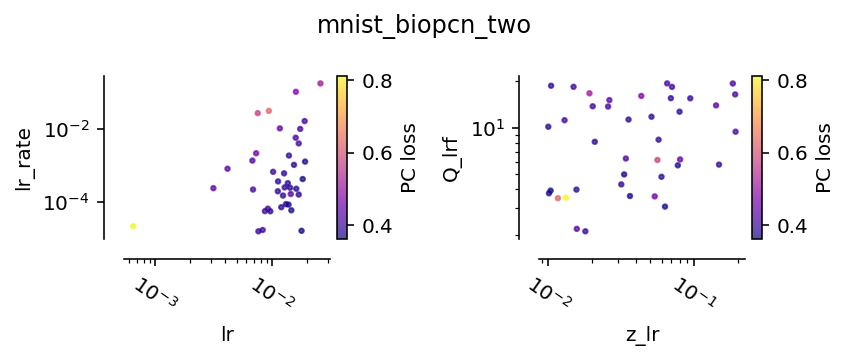

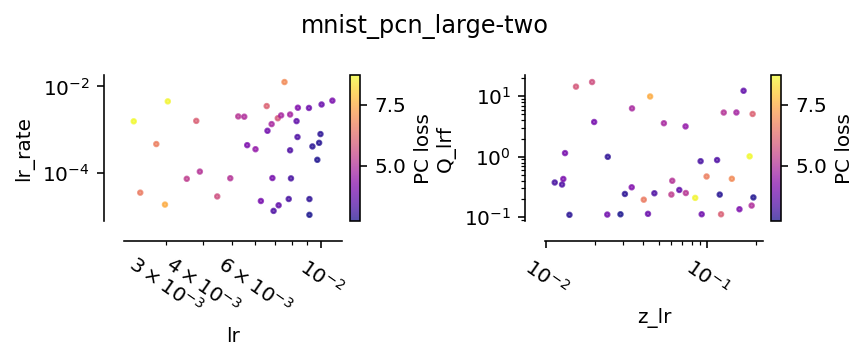

In [3]:
pairs = [("lr", "lr_rate"), ("z_lr", "Q_lrf")]
for context, study_set in studies.items():
    param_values = {
        param: [_.best_params[param] for _ in study_set]
        for param in ["z_lr", "lr", "lr_rate", "Q_lrf"]
    }
    pc_loss = [_.best_value for _ in study_set]

    with dv.FigureManager(1, 2, figsize=(6, 2.5)) as (fig, axs):
        for ax, pair in zip(axs, pairs):
            x_values = param_values[pair[0]]
            y_values = param_values[pair[1]]
            h = ax.scatter(x_values, y_values, c=pc_loss, s=5, cmap="plasma", alpha=0.7)
            cb = dv.colorbar(h)

            ax.set_xlabel(pair[0])
            ax.set_ylabel(pair[1])
            cb.set_label("PC loss")

            ax.set_xscale("log")
            ax.set_yscale("log")

            ax.tick_params(axis="x", which="both", labelrotation=-35)

        fig.suptitle(context)